## Demo 1: Spin-domain representation based simulation

This notebook provides examples of how to use functions to simulate RF pulse using spin-domain representations.

In [14]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/jiayao/jy/MRITOOLS') # may need to add your path, where 
from mritools import mri

In [4]:
# ------ select the device ------
# device = torch.device('cuda:0')    # if GPU is available
device = torch.device('cpu')       # CPU is still ok for this demo

### An example RF pulse for later simulation

In [10]:
# Example RF pulse, we use the sinc as an example
def demo_sinc_pulse(device):
    '''a simple sinc form pulse, without windowing'''
    dt = 0.01    # ms
    
    Nt = 400     
    t0 = 100  # time parameter for a sinc pulse
    b1 = 6*1e-3*torch.special.sinc((torch.arange(Nt)-200)/t0)

    # RF waveform, (2,Nt), (real;imag) channels, unit: mT
    rf = 0.0*torch.zeros((2,Nt)) 
    rf[0,:] = b1
    rf = rf.to(device)
    
    # Gradient, (3,Nt), X,Y,Z channels, unit: mT/m
    gr = 0.0*torch.zeros((3,Nt))  
    gr[2,:] = 10*torch.ones(Nt)  
    gr = gr.to(device)
    
    return rf,gr,dt,Nt

rf,gr,dt,Nt = demo_sinc_pulse(device)
(rf.shape, gr.shape, Nt, dt)
# pulse = mri.Pulse.example_slr_pulse(device=device)

(torch.Size([2, 400]), torch.Size([3, 400]), 400, 0.01)

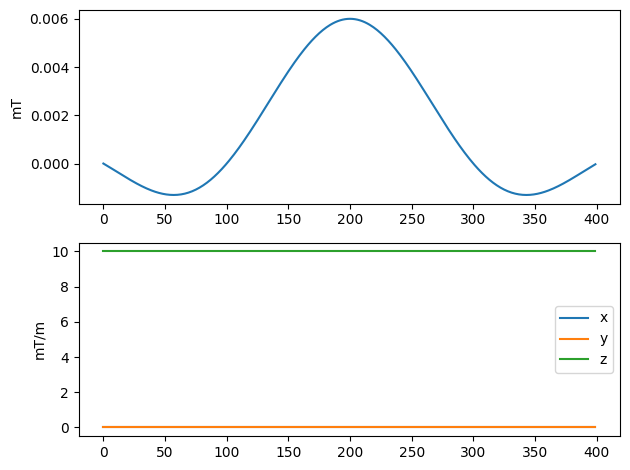

In [20]:
# Plot
fig = plt.figure()

ax = plt.subplot(211)
ax.plot(rf[0])
ax.set_ylabel('mT')

ax = plt.subplot(212)
[ax.plot(gr[ch],label=lb) for ch,lb in zip(range(3),['x','y','z'])]
ax.legend()
ax.set_ylabel('mT/m')

plt.tight_layout()
plt.show()

### Simulation of a single spin with RF pulse

In [5]:
# Spin objects
spin = mri.Spin(loc=[0,0,0], device=device)

In [11]:
# Simulation of spin-domain parameters
alpha,beta = mri.spinorsim_spin_singlestep(spin, Nt=Nt, dt=dt, rf=rf, gr=gr, device=device)
print((alpha,beta))

(tensor(0.7499+0.j), tensor(0.+0.6616j))


### Simulation of a number of spins with RF pulse

In [ ]:
# Object of a number of spins
spins = 0

In [ ]:
# Example RF pulse
alpha,beta = mri.spinorsim(spins, Nt=Nt, dt=dt, rf=rf, gr=gr, device=device)

In [ ]:
# Simulation of the spin-domain parameters